<a href="https://colab.research.google.com/github/zakkaizzatur/Data-Related-Projects/blob/main/Melbourne_Housing_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Melbourne Housing Exploratory Data Analysis

Pada *notebook* ini, saya akan menjelaskan tentang bagaimana proses eksplorasi data yang dapat membantu kita dalam memahami bagaimana keadaan data yang sedang kita olah.

Dalam pembuatan sebuah model *machine learning*, tahap eksplorasi merupakan tahap awal untuk mengetahui dan menentukan data mana saja yang berpengaruh/berkorelasi terhadap output yang diharapkan.

Dataset yang digunakan pada *notebook* ini dapat diakses pada link berikut: [dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot)

### Import Library dan Dataset

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
import os
os.environ['KAGGLE_USERNAME'] = 'zakkaizzatur'
os.environ['KAGGLE_KEY'] = 'ebfe0360db68f192c2b32c725f0c6b43'

In [10]:
!kaggle datasets download -d dansbecker/melbourne-housing-snapshot

melbourne-housing-snapshot.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip -q melbourne-housing-snapshot.zip -d .

In [59]:
path = '/content/melb_data.csv'

In [60]:
data = pd.read_csv(path)

In [61]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


data.head() dilakukan untuk melihat 5 baris awal dari seluruh data

In [16]:
data.shape

(13580, 21)

Dimensi dari dataset yang digunakan adalah 13580 baris x 21 kolom

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Dengan menggunakan data.info() didapatkan informasi umum dari seluruh kolom. Pada kolom Car, Landsize, BuildingArea, YearBuilt, dan CouncilArea terdapat data yang bernilai Null

In [62]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Dengan data.describe() kita dapat mengetahui bagaimana sebaran data numerik pada dataset. Kita dapat mengetahui nilai rata-rata, standar deviasi, minimum, maksimum, median, kuartil 1, dan kuartil 3. 

Berdasarkan data-data tersebut, didapatkan beberapa hal yang menarik:


*   Nilai minimum BuildingArea dan Landsize bernilai nol
*   Nilai minimum YearBuilt bernilai 1196, cukup jauh jika dibandingkan rata-ratanya

Nilai-nilai tersebut dapat menjadi sebuah outlier yang harus diolah untuk mendapatkan data yang baik.

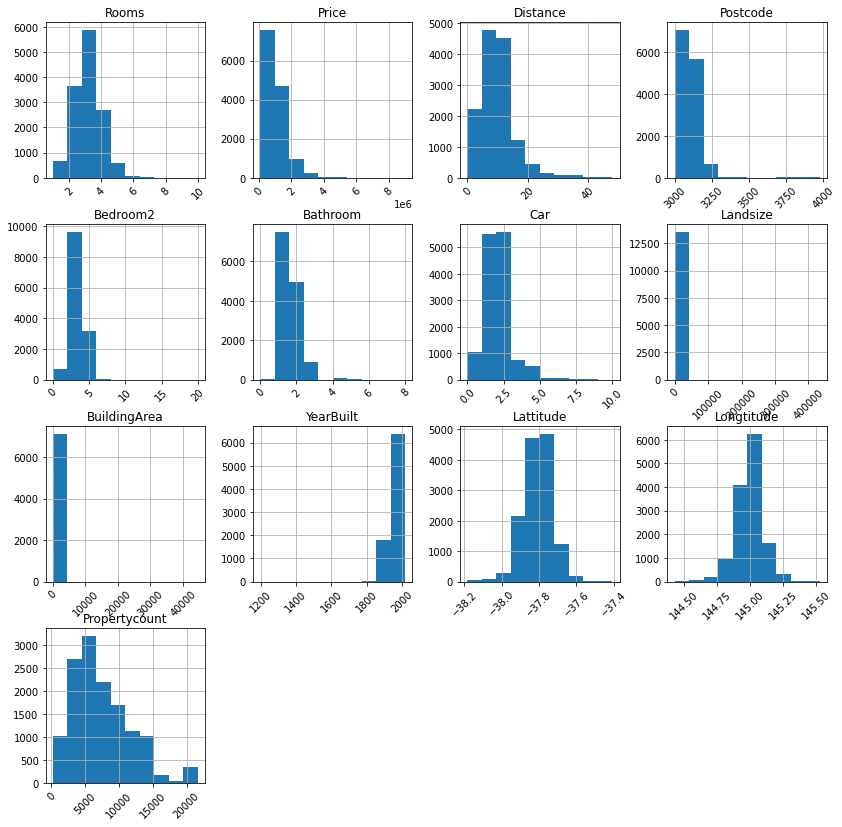

In [67]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

data.hist() dapat menggambarkan histogram dari seluruh data numerik yang ada pada dataset. Dengan histogram, kita dapat melihat persebaran data. Beberapa hal yang dapat di*highlight* adalah

*   Data Price memiliki skewness positif, menggambarkan harga yang terdapat pada data lebih banyak yang bernilai kurang dari median
*   Data BuildingArea dan Landsize memiliki skewness yang positif dan persebaran datanya terfokus



In [53]:
corrs = data.corr()
corrs

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


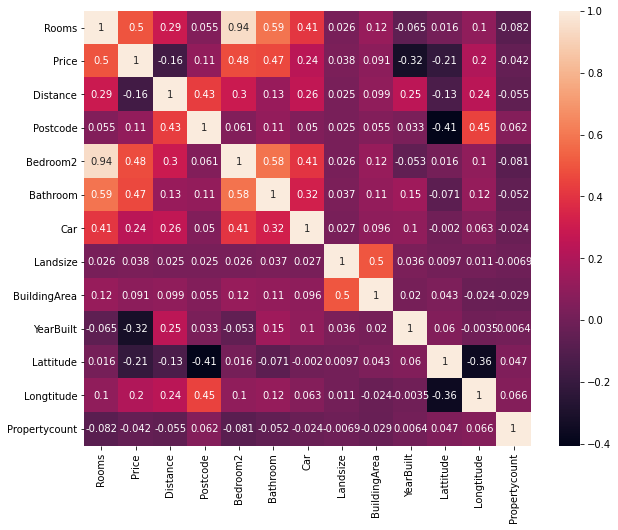

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, annot=True)
plt.show()

Dengan menggunakan heatmap, kita dapat mengetahui bagaimana korelasi antar data sehingga kita dapat menentukan faktor apa saja yang mempengaruhi output yang kita inginkan. Didapatkan:


*   Room, Bedroom2, dan Bathrooms memiliki korelasi positif yang cukup besar terhadap Price
*   YearBuilt dan Distance memiliki korelasi negatif terhadap Price

